In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [10]:
path = 'C:/Users/varun/OneDrive/Documents/data/new_data/Walk/'
df_names = []
for file in os.listdir(path):
    if '.csv' in file:
        df_names.append(file)
print(df_names)

['Xsens DOT 2_20240320_161646_597.csv', 'Xsens DOT 3_20240320_161646_596.csv', 'Xsens DOT 4_20240320_161646_595.csv', 'Xsens DOT 5_20240320_161646_597.csv', 'Xsens DOT1_20240320_161646_597.csv']


In [11]:
data = pd.read_csv('C:/Users/varun/OneDrive/Documents/data/new_data/Walk/Xsens DOT 2_20240320_161646_597.csv', skiprows=10)
data.head(10)

,PacketCounter,SampleTimeFine,Quat_W,Quat_X,Quat_Y,Quat_Z,FreeAcc_X,FreeAcc_Y,FreeAcc_Z,Status
0,1,1040441162,-0.445357,0.630640,0.243220,0.587198,1.369882,4.309354,4.167670,0
1,2,1040457829,-0.453808,0.624611,0.248818,0.584822,1.127972,2.587504,1.918827,0
2,3,1040474496,-0.461046,0.619685,0.255775,0.581389,1.073126,1.249521,-0.709185,0
3,4,1040491163,-0.463929,0.618359,0.261877,0.577780,0.336963,-0.742340,-2.308499,0
4,5,1040507830,-0.460832,0.622793,0.268108,0.572615,0.804210,-4.597714,-0.346898,0
5,6,1040524497,-0.451701,0.629553,0.270967,0.571149,3.763520,-6.956798,4.628825,0
6,7,1040541164,-0.441727,0.633491,0.267466,0.576224,7.787340,-2.564289,3.122457,0
7,8,1040557831,-0.432034,0.635590,0.259617,0.584788,6.079219,3.562988,2.528275,0
8,9,1040574498,-0.425086,0.641543,0.253843,0.585914,0.359908,2.916512,3.142850,0
9,10,1040591165,-0.412737,0.653522,0.241309,0.586800,-0.748511,-4.945264,-0.897430,0


In [ ]:
def plot_data(file):
    if '.csv' not in file:
        print("Invalid file")
    
    data = pd.read_csv(file,skiprows=10)
    data_melted = pd.melt(data, id_vars=['PacketCounter'], value_vars=['FreeAcc_X', 'FreeAcc_Y', 'FreeAcc_Z'],
                      var_name='Variable', value_name='Value')
    print("FILE NAME:", file)
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))

    # Plot Quat_W vs PacketCounter
    sns.lineplot(data=data, x='PacketCounter', y='Quat_W', ax=axs[0, 0])
    axs[0, 0].set_ylabel('Quat_W')
    axs[0, 0].set_xlabel('PacketCounter')
    axs[0, 0].set_title(' PacketCounter vs Plot of Quat_W ')
    
    # Plot Quat_X vs PacketCounter
    sns.lineplot(data=data, x='PacketCounter', y='Quat_X', ax=axs[0, 1])
    axs[0, 1].set_ylabel('Quat_X')
    axs[0, 1].set_xlabel('PacketCounter')
    axs[0, 1].set_title(' PacketCounter vs Plot of Quat_X')
    
    # Plot Quat_Y vs PacketCounter
    sns.lineplot(data=data, x='PacketCounter', y='Quat_Y', ax=axs[1, 0])
    axs[1, 0].set_ylabel('Quat_Y')
    axs[1, 0].set_xlabel('PacketCounter')
    axs[1, 0].set_title('PacketCounter vs Plot of Quat_Y')
    
    # Plot Quat_Z vs PacketCounter
    sns.lineplot(data=data, x='PacketCounter', y='Quat_Z', ax=axs[1, 1])
    axs[1, 1].set_ylabel('Quat_Z')
    axs[1, 1].set_xlabel('PacketCounter')
    axs[1, 1].set_title('PacketCounter vs Plot of Quat_Z')
    

    # Plot FreeAcc_X, FreeAcc_Y, and FreeAcc_Z vs PacketCounter in one plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data_melted, x='PacketCounter', y='Value', hue='Variable', linewidth=2.5)
    plt.xlabel('PacketCounter')
    plt.ylabel('Values')
    plt.title('Plot of FreeAcc_X, FreeAcc_Y, FreeAcc_Z vs PacketCounter')
    plt.legend(title='Variable')
    plt.show()

    
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [ ]:
for file in df_names:
    plot_data(path + file)

In [ ]:
def change_head_and_merge(file):
    path = 'C:/Users/varun/OneDrive/Documents/data/new_data/Walk/'
    merged_df = pd.DataFrame()
    name_to_add = file[5:11]
    df = pd.read_csv(path+file, skiprows=10)
    df.columns = [col + name_to_add for col in df.columns]
    merged_df = pd.concat([merged_df,df], axis=1)
    return merged_df

In [ ]:
merged_df = pd.DataFrame()
for file in df_names:
    new_df = change_head_and_merge(file)
    merged_df = pd.concat([merged_df, new_df], axis=1)

# Check the merged DataFrame
merged_df.count()

In [2]:
for column in merged_df.columns:
    print(column)

NameError: name 'merged_df' is not defined

In [3]:
columns_to_drop = ['SampleTimeFine DOT 2', 'SampleTimeFine DOT 3', 'SampleTimeFine DOT 4', 'SampleTimeFine DOT 5', 'SampleTimeFine DOT1_','Status DOT 2', 'Status DOT 3', 'Status DOT 4', 'Status DOT 5','Status DOT1_']  # List of column names to drop
merged_df.drop(columns=columns_to_drop, inplace=True, axis=1)

NameError: name 'merged_df' is not defined

In [4]:
merged_df

NameError: name 'merged_df' is not defined

In [5]:
min_rows = min([
    merged_df['PacketCounter DOT 2'].count(),
    merged_df['PacketCounter DOT 3'].count(),
    merged_df['PacketCounter DOT 4'].count(),
    merged_df['PacketCounter DOT 5'].count(),
    merged_df['PacketCounter DOT1_'].count()
])

# Truncate the DataFrame to contain only the first 'min_rows' rows
merged_df = merged_df.iloc[:min_rows]

# Check the DataFrame after truncation
merged_df

NameError: name 'merged_df' is not defined

In [6]:
merged_df['PacketCounter'] = pd.concat([
    merged_df['PacketCounter DOT 2'],
    merged_df['PacketCounter DOT 3'],
    merged_df['PacketCounter DOT 4'],
    merged_df['PacketCounter DOT 5'],
    merged_df['PacketCounter DOT1_']
], ignore_index=True)

# Drop the individual 'PacketCounter' columns
merged_df.drop(columns=[
    'PacketCounter DOT 2',
    'PacketCounter DOT 3',
    'PacketCounter DOT 4',
    'PacketCounter DOT 5',
    'PacketCounter DOT1_'
], inplace=True)

# Check the DataFrame after merging 'PacketCounter' columns


NameError: name 'pd' is not defined

In [7]:
merged_df

NameError: name 'merged_df' is not defined

In [8]:
# Define the desired column order
desired_column_order = [
    'PacketCounter',
    'Quat_W DOT1_',
    'Quat_X DOT1_',
    'Quat_Y DOT1_',
    'Quat_Z DOT1_',
    'FreeAcc_X DOT1_',
    'FreeAcc_Y DOT1_',
    'FreeAcc_Z DOT1_',
    'Quat_W DOT 2',
    'Quat_X DOT 2',
    'Quat_Y DOT 2',
    'Quat_Z DOT 2',
    'FreeAcc_X DOT 2',
    'FreeAcc_Y DOT 2',
    'FreeAcc_Z DOT 2',
    'Quat_W DOT 3',
    'Quat_X DOT 3',
    'Quat_Y DOT 3',
    'Quat_Z DOT 3',
    'FreeAcc_X DOT 3',
    'FreeAcc_Y DOT 3',
    'FreeAcc_Z DOT 3',
    'Quat_W DOT 4',
    'Quat_X DOT 4',
    'Quat_Y DOT 4',
    'Quat_Z DOT 4',
    'FreeAcc_X DOT 4',
    'FreeAcc_Y DOT 4',
    'FreeAcc_Z DOT 4',
    'Quat_W DOT 5',
    'Quat_X DOT 5',
    'Quat_Y DOT 5',
    'Quat_Z DOT 5',
    'FreeAcc_X DOT 5',
    'FreeAcc_Y DOT 5',
    'FreeAcc_Z DOT 5',
]

# Reindex the DataFrame with the desired column order
merged_df = merged_df.reindex(columns=desired_column_order)

# Check the DataFrame after reindexing



NameError: name 'merged_df' is not defined

In [16]:
merged_df

,PacketCounter,Quat_W DOT1_,Quat_X DOT1_,Quat_Y DOT1_,Quat_Z DOT1_,FreeAcc_X DOT1_,FreeAcc_Y DOT1_,FreeAcc_Z DOT1_,Quat_W DOT 2,Quat_X DOT 2,...,FreeAcc_X DOT 4,FreeAcc_Y DOT 4,FreeAcc_Z DOT 4,Quat_W DOT 5,Quat_X DOT 5,Quat_Y DOT 5,Quat_Z DOT 5,FreeAcc_X DOT 5,FreeAcc_Y DOT 5,FreeAcc_Z DOT 5
0,1.0,0.579952,0.493710,-0.405333,0.505581,-0.358732,0.287804,-0.348111,-0.445357,0.630640,...,-1.000168,-15.187057,-7.921004,-0.551743,0.188587,0.801619,-0.132042,0.052248,1.689432,1.528748
1,2.0,0.578673,0.494434,-0.401601,0.509302,-0.533850,-0.133412,-0.662376,-0.453808,0.624611,...,0.542251,-14.041570,-6.246111,-0.551301,0.195383,0.798041,-0.145040,-0.745963,2.106796,2.204340
2,3.0,0.576204,0.496530,-0.401028,0.510514,-0.500320,0.565448,-0.837430,-0.461046,0.619685,...,1.569808,-11.651844,-3.336946,-0.550485,0.202977,0.794107,-0.158665,-1.345185,2.885623,2.266811
3,4.0,0.573247,0.499340,-0.402699,0.509786,-0.055303,1.662777,-0.886578,-0.463929,0.618359,...,2.186335,-8.804549,-1.242796,-0.549048,0.211663,0.789856,-0.172877,-1.465149,3.632062,2.273336
4,5.0,0.570574,0.502039,-0.405717,0.507737,0.837929,2.096832,-0.046095,-0.460832,0.622793,...,6.566552,6.151934,7.821045,-0.547589,0.222231,0.784711,-0.187088,-1.785727,5.270707,3.617251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,569.0,0.484570,-0.466315,-0.489255,-0.555312,0.900246,0.367665,-1.094575,0.663169,0.153344,...,1.407596,11.547181,5.949511,-0.025395,0.777055,-0.192129,0.598866,-0.937530,-0.396739,0.522572
569,570.0,0.484588,-0.467767,-0.491366,-0.552203,1.309865,0.118118,-0.158336,0.658806,0.158863,...,3.050740,15.063143,3.209246,-0.033825,0.775915,-0.195719,0.598765,-1.056966,-0.705945,0.671187
570,571.0,0.486693,-0.465906,-0.488613,-0.554364,1.177175,2.098465,0.016876,0.655076,0.166012,...,6.087419,15.234532,-0.958642,-0.042638,0.774563,-0.200284,0.598444,-0.873988,-0.792105,0.929225
571,572.0,0.488147,-0.463518,-0.485057,-0.558198,1.002671,4.175662,-0.840690,0.651489,0.169966,...,6.834793,14.125057,-6.636051,-0.052138,0.772941,-0.205715,0.597945,-0.224845,-0.789578,1.029043


## Training DOT1 preditcs DOT2

In [60]:
X = merged_df[['Quat_W DOT1_',
               'Quat_X DOT1_',
               'Quat_Y DOT1_',
               'Quat_Z DOT1_',
               'FreeAcc_X DOT1_',
               'FreeAcc_Y DOT1_',
               'FreeAcc_Z DOT1_']]
y_DOT2 = merged_df[['Quat_W DOT 2',
                    'Quat_X DOT 2',
                    'Quat_Y DOT 2',
                    'Quat_Z DOT 2',
                    'FreeAcc_X DOT 2',
                    'FreeAcc_Y DOT 2',
                    'FreeAcc_Z DOT 2']]

In [61]:
X_train,X_test,y_DOT2_train,y_DOT2_test = train_test_split(X,y_DOT2,test_size=0.2,random_state=42)

In [62]:
X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])

In [63]:
model = Sequential()
model.add(LSTM(100,input_shape=(1,7)))
model.add(Dense(7))

C:\Users\varun\anaconda3\envs\GAN_LSTM\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
model.compile(optimizer='adam', loss='mse')

In [65]:
model.fit(X_train,y_DOT2_train,epochs=500,batch_size=32,verbose=1)

Epoch 1/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1513
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2560 
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7457 
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7742 
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6683 
Epoch 6/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1226 
Epoch 7/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0112 
Epoch 8/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8051 
Epoch 9/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7789 
Epoch 10/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6947 
Epoch 11/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0088 
Epoch 12/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9053 
Epoch 13/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7125 
Epoch 14/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7584 
Epoch 15/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

In [66]:
X_test = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

In [67]:
mse = model.evaluate(X_test, y_DOT2_test)
print("Mean Squared Error:", mse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1195  
Mean Squared Error: 2.7147324085235596


In [141]:
predictions = model.predict(X)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


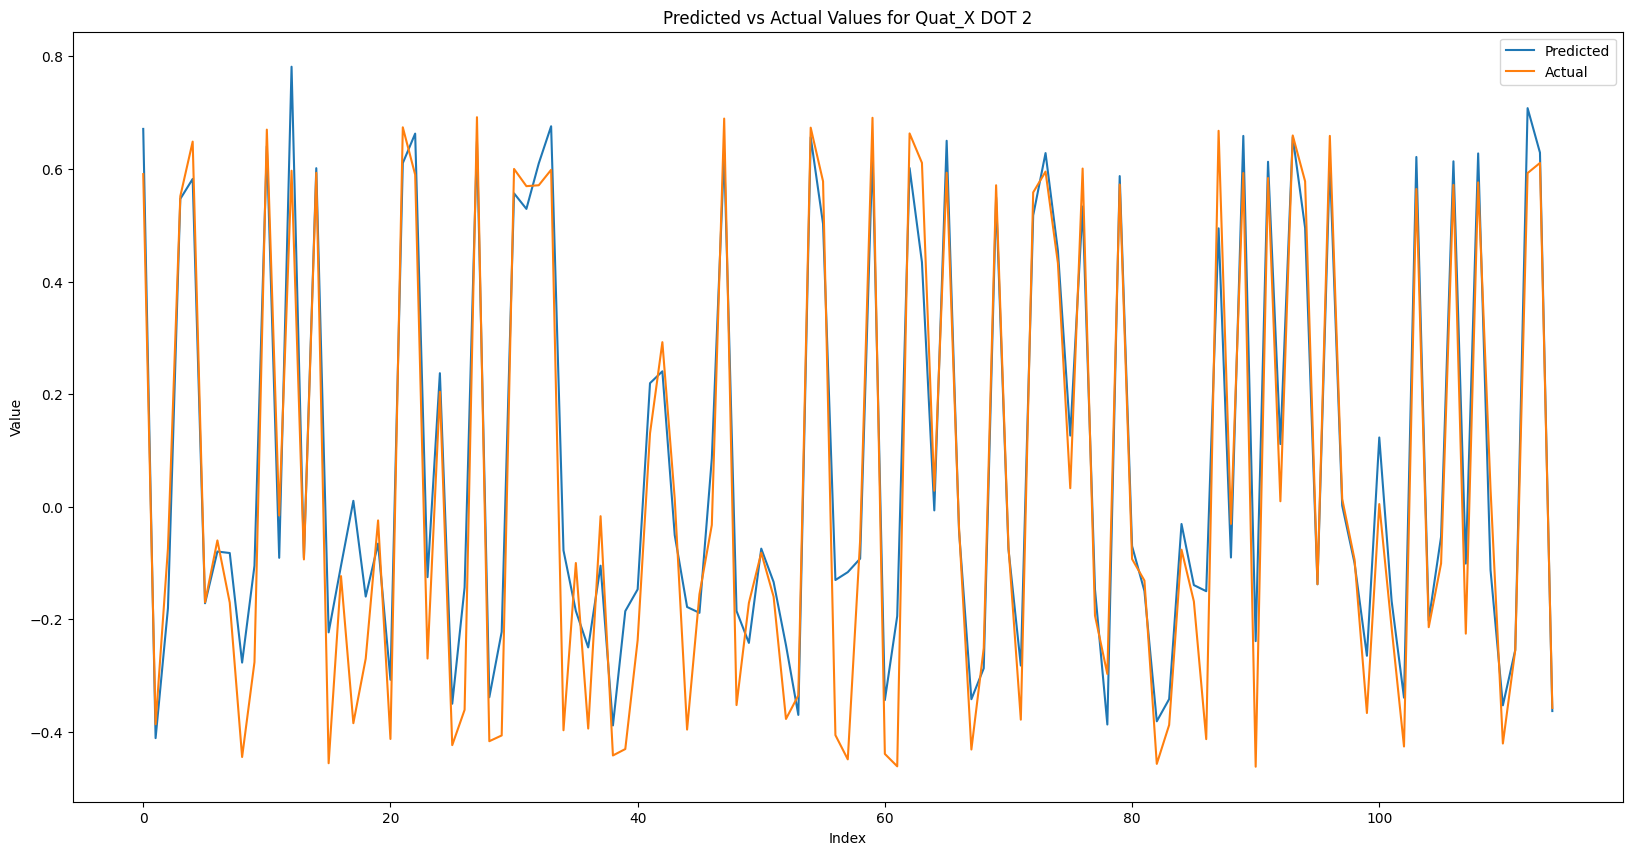

In [69]:
plt.figure(figsize=(20, 10))
plt.plot(predictions[:, 0], label='Predicted')
plt.plot(np.array(y_DOT2_test)[:, 0], label='Actual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predicted vs Actual Values for Quat_X DOT 2')
plt.legend()
plt.show()


In [82]:

X = np.array(X).reshape(X.shape[0], 1, X.shape[1])
predictions = model.predict(X)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


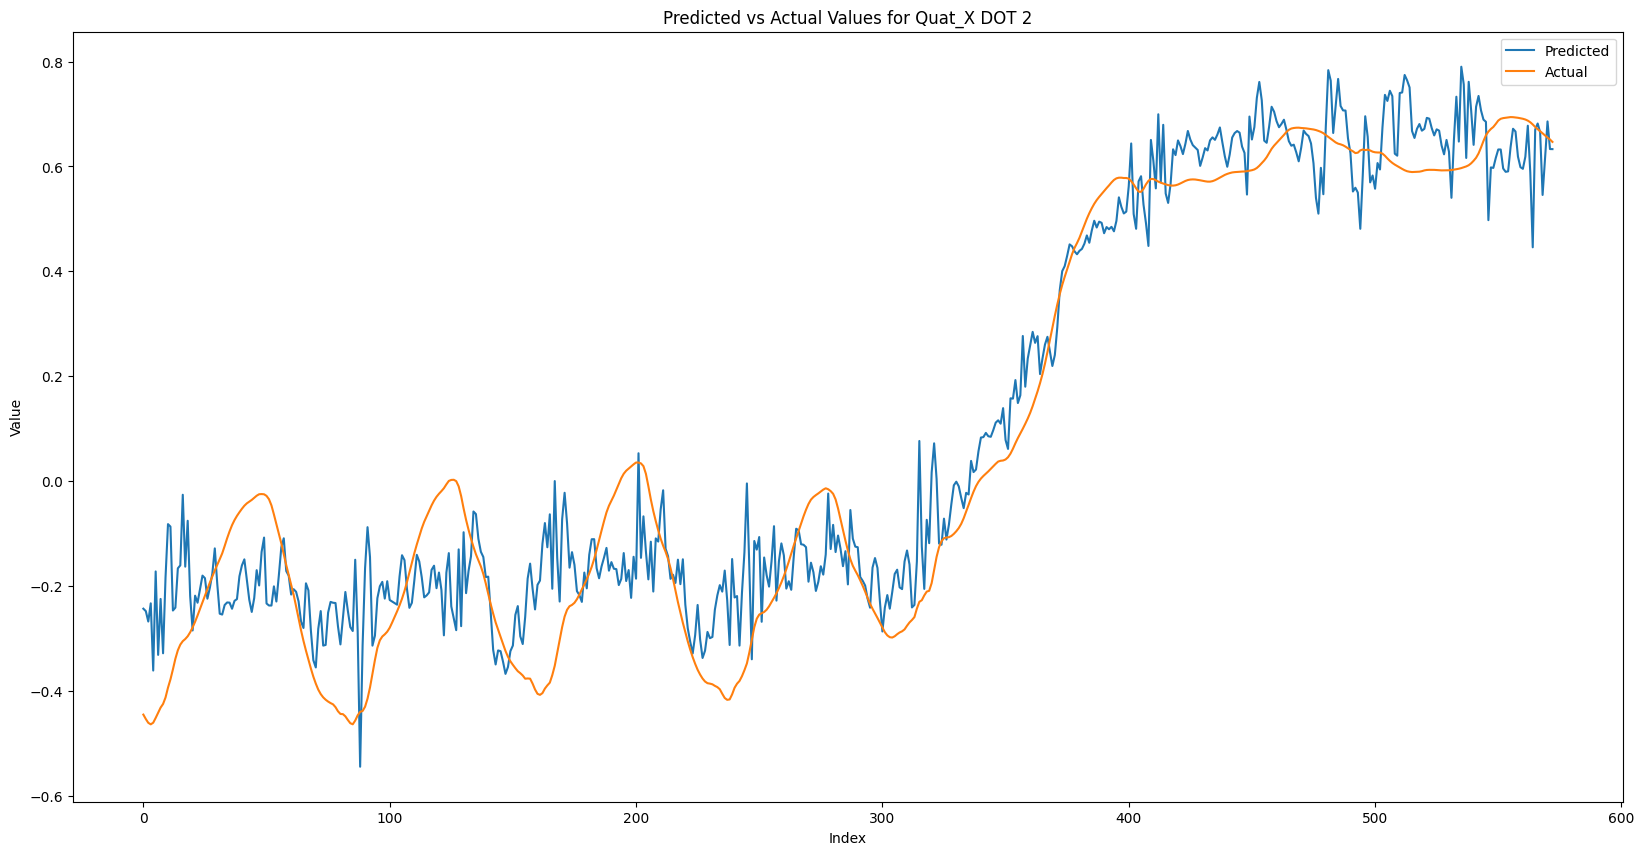

In [146]:
plt.figure(figsize=(20, 10))
plt.plot(np.array(filtered_data)[:,0], label='Predicted')
plt.plot(np.array(y_DOT2)[:, 0], label='Actual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predicted vs Actual Values for Quat_X DOT 2')
plt.legend()
plt.show()


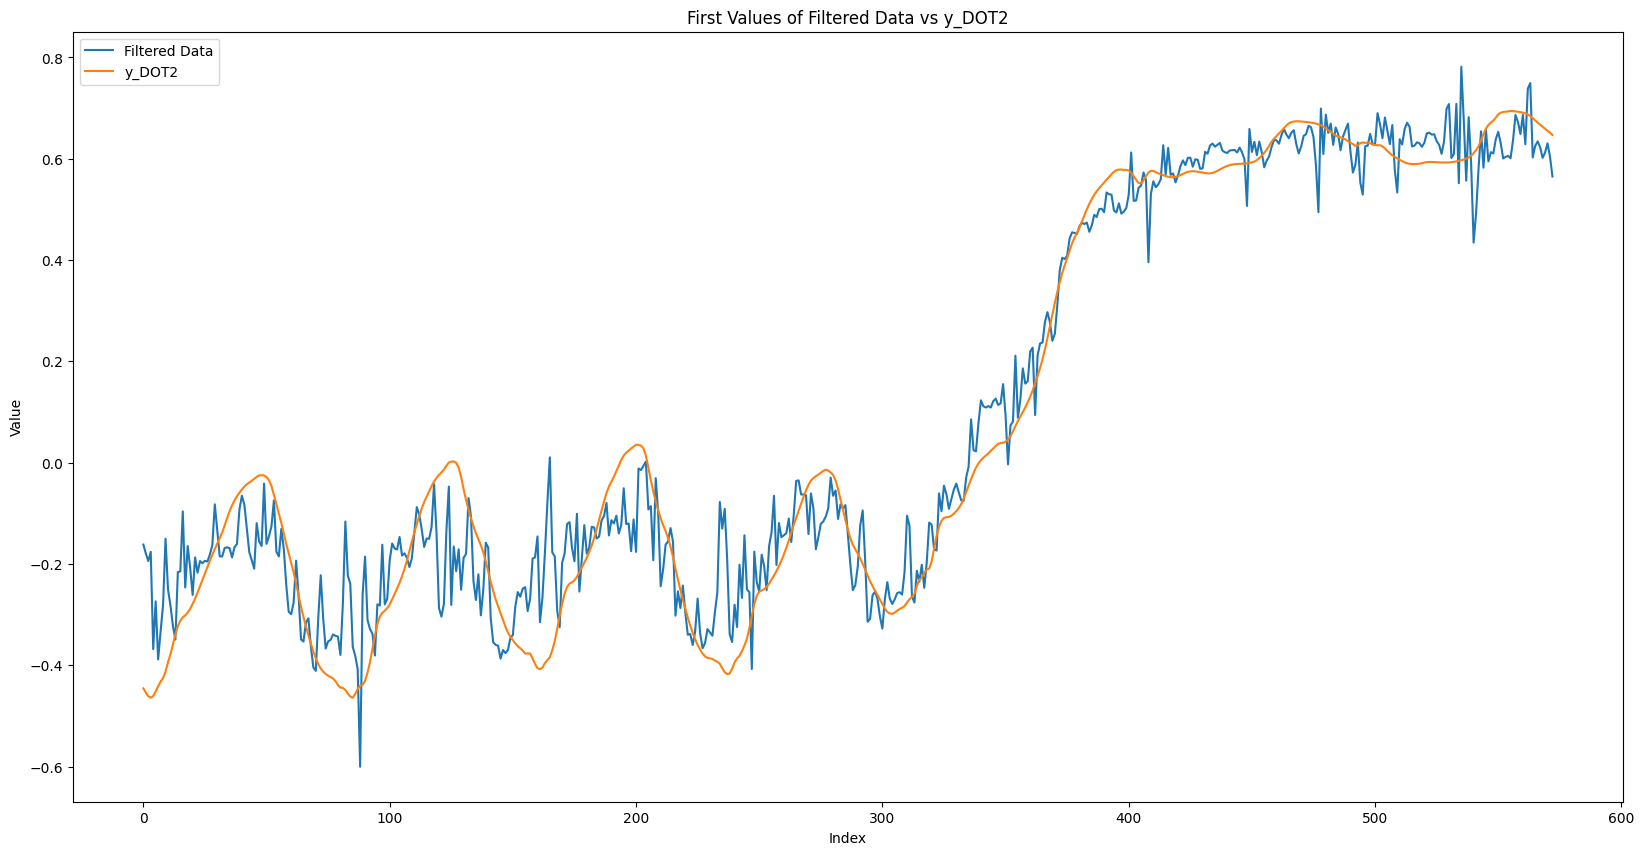

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# Extract first values from filtered_data and y_DOT2
y_DOT2_first_values = np.array(y_DOT2)[:, 0]

# Plotting
plt.figure(figsize=(20, 10))
plt.plot(np.array(predictions)[:, 0], label='Filtered Data')
plt.plot(y_DOT2_first_values, label='y_DOT2')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('First Values of Filtered Data vs y_DOT2')
plt.legend()
plt.show()


In [139]:
len(y_DOT2_first_values)

573

In [145]:
from scipy.signal import butter, filtfilt

# Define low-pass filter parameters
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Adjusted cutoff frequency and sampling frequency
cutoff_frequency = 1  # Adjust cutoff frequency as needed
fs = 3.0  # Adjust sampling frequency accordingly

# Sample data (replace this with your actual data)
data = predictions

# Define low-pass filter parameters
order = 5  # Filter order, change this as needed

# Filter each value using low-pass filter
filtered_data = []
for row in data:
    filtered_row = apply_lowpass_filter(row, cutoff_frequency, fs, order)
    filtered_data.append(filtered_row)

# Print filtered data
for row in filtered_data:
    print(row)


[-0.24336937  0.68671511  0.581562   -0.21764459  0.78974047  2.08915988
  1.00175187]
[-0.24803505  0.66507074  0.54696036 -0.10624304  0.87585853  2.03115263
  1.07911565]
[-0.26789498  0.68631445  0.59543384 -0.10942798  0.70579694  1.56707787
  0.23134153]
[-0.23316348  0.64568336  0.58057798  0.04657952  0.5213284   0.76214005
 -0.70830641]
[-0.36133833  0.46747678  0.54200085  0.50683641  0.03300916 -1.10729057
 -2.05375705]
[-0.17232228  0.40617215  0.32919171  1.07601818  0.93526318  0.55672247
  2.75777499]
[-0.33147542  0.46646346  0.28515402  1.03271449  1.70220425  1.48645368
  1.98693119]
[-0.22480295  0.25509989  0.24454885  1.06585959  0.56606742 -0.36175084
  1.56148763]
[-0.32843392  0.60660966  0.40281957  0.27114776  1.82395368  3.05387643
  2.15729185]
[-0.18374725  0.56483741  0.50243298  0.01268744  0.43268626  1.13691796
  1.00624585]
[-0.08209295  0.1597893   0.52530724  1.00299614 -1.72434793 -3.80293565
  0.20444945]
[-0.08685379  0.06460188  0.46676146  1.423

In [125]:
np.array(filtered_data)[:,0]

array([-6.25840534e-01, -6.26610709e-01, -6.09153352e-01, -4.81655300e-01,
       -4.19334617e-01, -3.08466265e-01, -6.88637321e-01, -2.63175001e-01,
       -8.81954487e-01, -4.10068230e-01,  4.29591756e-01,  5.84958986e-01,
        1.29032504e-01,  1.23036779e-01,  1.78664410e-01,  1.81261357e-01,
        4.47929685e-01, -7.49074664e-03, -7.97219713e-02, -6.33063761e-01,
       -4.37878997e-01, -3.83437814e-01, -4.55548268e-01, -4.67154808e-01,
       -3.00714472e-01, -3.03912921e-01, -4.92705115e-01, -4.19406202e-01,
       -2.46272465e-01, -2.81988257e-01, -4.59959656e-01, -5.71920847e-01,
       -5.71835893e-01, -5.38744223e-01, -5.15711218e-01, -5.13044001e-01,
       -5.02283205e-01, -4.88507449e-01, -4.95170298e-01, -5.26924484e-01,
       -4.95895769e-01, -4.17615955e-01, -5.01162924e-01, -5.37186791e-01,
       -5.40400009e-01, -3.39596633e-01, -3.95807411e-01, -3.62550089e-01,
       -3.97429695e-01, -6.82360940e-01, -7.77589844e-01, -5.06683370e-01,
       -5.83968357e-01, -

In [27]:
import pandas as pd



# Column headers
column_headers = ['Quat_W',
                    'Quat_X',
                    'Quat_Y',
                    'Quat_Z',
                    'FreeAcc_X',
                    'FreeAcc_Y',
                    'FreeAcc_Z']

# Convert arrays to DataFrame with column headers
df = pd.DataFrame(predictions, columns=column_headers)

# Save DataFrame to CSV
df.to_csv("predicted_values.csv", index=False)

print("DataFrame saved to CSV successfully.")


DataFrame saved to CSV successfully.


In [28]:
path = "C:/Users/varun/OneDrive/Documents/Isafe/predicted_values.csv"

In [48]:
df

NameError: name 'df' is not defined

In [29]:
import pandas as pd

# Read the first CSV file
df1 = pd.read_csv('C:/Users/varun/OneDrive/Documents/data/new_data/Walk/Xsens DOT 2_20240320_161646_597.csv', skiprows=10)

# Select the column you want to move
column_to_move = df1["PacketCounter"]  # Replace "Column_Name" with the actual name of the column

# Read the second CSV file
df2 = pd.read_csv(path)

# Add the selected column from the first CSV file to the second CSV file
df2["PacketCounter"] = column_to_move  # Replace "New_Column_Name" with the desired name for the column

# Write the updated DataFrame to a new CSV file
df2.to_csv("predicted_values.csv", index=False)
desired_column_order = ['PacketCounter','Quat_W','Quat_X','Quat_Y','Quat_Z','FreeAcc_X','FreeAcc_Y','FreeAcc_Z']
df2 = df2.reindex(columns=desired_column_order)
print(os.getcwd())

print("Column moved successfully from the first CSV file to the second CSV file.")


C:\Users\varun\OneDrive\Documents\Isafe
Column moved successfully from the first CSV file to the second CSV file.


In [30]:
df = pd.read_csv("C:/Users/varun/OneDrive/Documents/Isafe/predicted_values.csv")

FILE NAME: Xsens DOT1_20240320_161646_597.csv


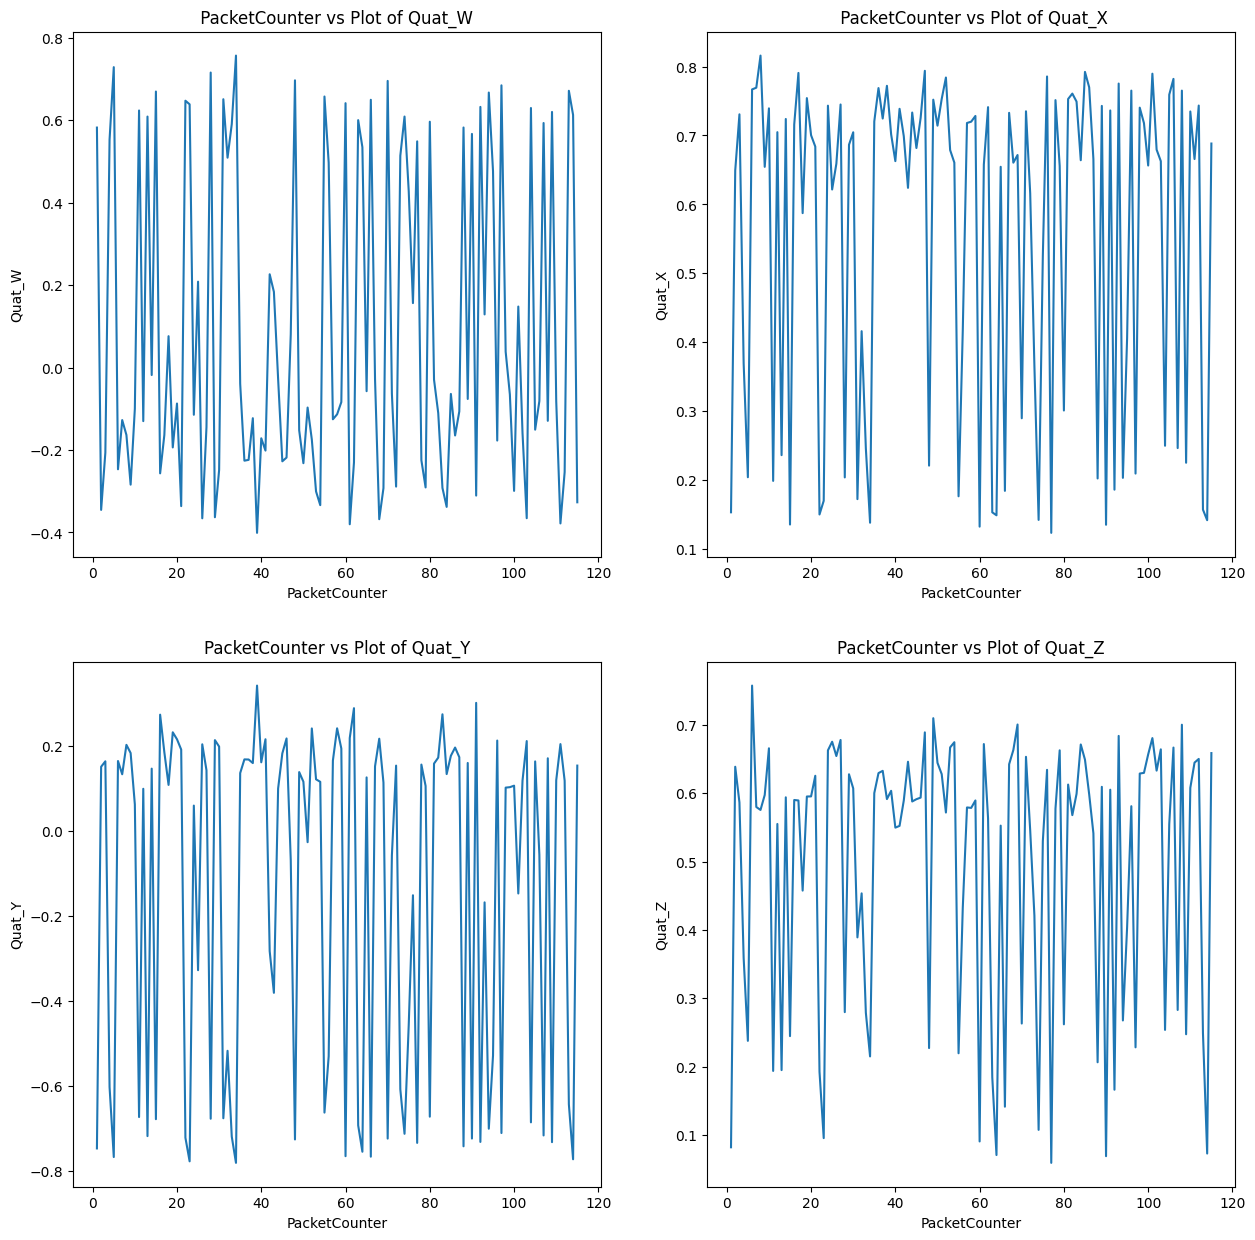

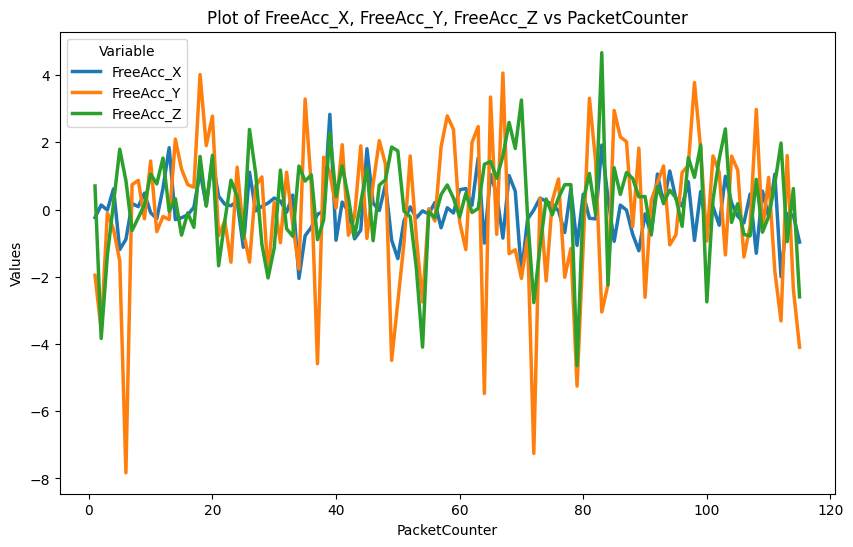

<Figure size 640x480 with 0 Axes>

In [56]:
data = pd.read_csv("C:/Users/varun/OneDrive/Documents/Isafe/predicted_values.csv")
data_melted = pd.melt(data, id_vars=['PacketCounter'], value_vars=['FreeAcc_X', 'FreeAcc_Y', 'FreeAcc_Z'],
                      var_name='Variable', value_name='Value')
print("FILE NAME:", file)
    
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

    # Plot Quat_W vs PacketCounter
sns.lineplot(data=data, x='PacketCounter', y='Quat_W', ax=axs[0, 0])
axs[0, 0].set_ylabel('Quat_W')
axs[0, 0].set_xlabel('PacketCounter')
axs[0, 0].set_title(' PacketCounter vs Plot of Quat_W ')
    
    # Plot Quat_X vs PacketCounter
sns.lineplot(data=data, x='PacketCounter', y='Quat_X', ax=axs[0, 1])
axs[0, 1].set_ylabel('Quat_X')
axs[0, 1].set_xlabel('PacketCounter')
axs[0, 1].set_title(' PacketCounter vs Plot of Quat_X')

    # Plot Quat_Y vs PacketCounter
sns.lineplot(data=data, x='PacketCounter', y='Quat_Y', ax=axs[1, 0])
axs[1, 0].set_ylabel('Quat_Y')
axs[1, 0].set_xlabel('PacketCounter')

axs[1, 0].set_title('PacketCounter vs Plot of Quat_Y')
    
    # Plot Quat_Z vs PacketCounter

sns.lineplot(data=data, x='PacketCounter', y='Quat_Z', ax=axs[1, 1])

axs[1, 1].set_ylabel('Quat_Z')

axs[1, 1].set_xlabel('PacketCounter')

axs[1, 1].set_title('PacketCounter vs Plot of Quat_Z')
    

#Plot FreeAcc_X, FreeAcc_Y, and FreeAcc_Z vs PacketCounter in one plot

plt.figure(figsize=(10, 6))

sns.lineplot(data=data_melted, x='PacketCounter', y='Value', hue='Variable', linewidth=2.5)

plt.xlabel('PacketCounter')

plt.ylabel('Values')
  
plt.title('Plot of FreeAcc_X, FreeAcc_Y, FreeAcc_Z vs PacketCounter')

plt.legend(title='Variable')

plt.show()

    
    
    # Adjust layout

plt.tight_layout()
    

# Show the plot

plt.show()


In [59]:
data

,Quat_W,Quat_X,Quat_Y,Quat_Z,FreeAcc_X,FreeAcc_Y,FreeAcc_Z,PacketCounter
0,0.582192,0.153424,-0.746195,0.081763,-0.236076,-1.954929,0.701669,1
1,-0.345400,0.649125,0.150614,0.638865,0.134584,-3.586059,-3.834773,2
2,-0.206589,0.730675,0.163425,0.586600,-0.016349,-0.106944,-1.358984,3
3,0.552946,0.369305,-0.601929,0.358814,0.616824,-0.587860,0.190873,4
4,0.728815,0.204269,-0.766422,0.237582,-1.190701,-1.528069,1.796450,5
...,...,...,...,...,...,...,...,...
110,-0.378240,0.665799,0.203842,0.644905,1.052750,-1.830189,0.764243,111
111,-0.253549,0.743400,0.117764,0.650317,-1.996513,-3.313886,1.978724,112
112,0.671472,0.157302,-0.642486,0.248995,-0.117929,1.605055,-0.952808,113
113,0.612987,0.141969,-0.771692,0.072622,-0.173946,-2.372088,0.622929,114


In [55]:
import pandas as pd
from filterpy.kalman import KalmanFilter
import numpy as np

# Load data from CSV
data = pd.read_csv("C:/Users/varun/OneDrive/Documents/Isafe/predicted_values.csv")

# Define Kalman filter parameters
dt = 1.0  # Time step
kf = KalmanFilter(dim_x=1, dim_z=1)  # One-dimensional Kalman filter
kf.x = np.array([[0.]])  # Initial state estimate
kf.F = np.array([[1.]])  # State transition matrix
kf.H = np.array([[1.]])  # Measurement function
kf.P *= 1000.  # Covariance matrix
kf.R = 5  # Measurement noise covariance
kf.Q = 0.1  # Process noise covariance

# Define function to filter a single value using Kalman filter
def kalman_filter_single_value(value):
    kf.predict()
    kf.update(value)
    return kf.x[0, 0]

# Apply Kalman filter to each column
filtered_data = pd.DataFrame()
for col in data.columns:
    filtered_data[col] = data[col].apply(kalman_filter_single_value)

# Save filtered data back to CSV
filtered_data.to_csv("C:/Users/varun/OneDrive/Documents/Isafe/predicted_values_filtered.csv", index=False)


## Train DOT1 predicts DOT3

In [30]:
X = merged_df[['Quat_W DOT1_',
               'Quat_X DOT1_',
               'Quat_Y DOT1_',
               'Quat_Z DOT1_',
               'FreeAcc_X DOT1_',
               'FreeAcc_Y DOT1_',
               'FreeAcc_Z DOT1_']]
y_DOT3 = merged_df[['Quat_W DOT 3',
                    'Quat_X DOT 3',
                    'Quat_Y DOT 3',
                    'Quat_Z DOT 3',
                    'FreeAcc_X DOT 3',
                    'FreeAcc_Y DOT 3',
                    'FreeAcc_Z DOT 3']]

In [31]:
X_train,X_test,y_DOT3_train,y_DOT3_test = train_test_split(X,y_DOT3,test_size=0.2,random_state=42)

In [35]:
X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])

In [21]:
model = Sequential()
model.add(LSTM(100,input_shape=(1,7)))
model.add(Dense(7))

C:\Users\varun\anaconda3\envs\GAN_LSTM\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer='adam', loss='mse')

In [23]:
model.fit(X_train,y_DOT3_train,epochs=750,batch_size=32,verbose=1)

Epoch 1/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7541
Epoch 2/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4042 
Epoch 3/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6280 
Epoch 4/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4736 
Epoch 5/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5938 
Epoch 6/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3704 
Epoch 7/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2773 
Epoch 8/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3579 
Epoch 9/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2229 
Epoch 10/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3509 
Epoch 11/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2260 
Epoch 12/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1982 
Epoch 13/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3593 
Epoch 14/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2529 
Epoch 15/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

In [24]:
X_test = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

In [25]:
mse = model.evaluate(X_test, y_DOT3_test)
print("Mean Squared Error:", mse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3500  
Mean Squared Error: 2.1728403568267822


In [26]:
predictions = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


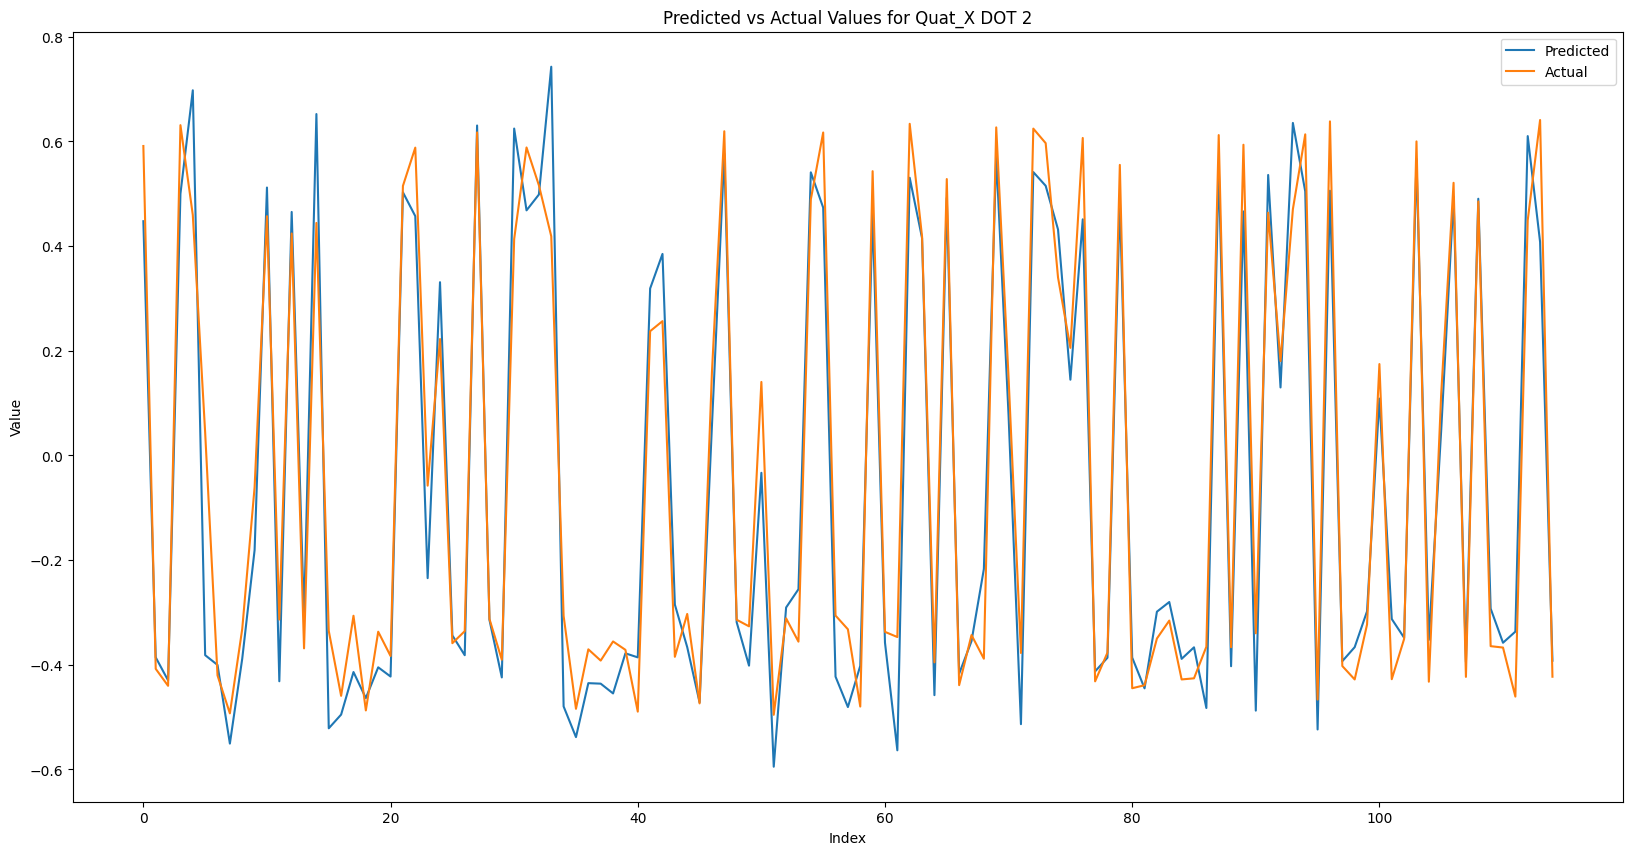

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(predictions[:, 0], label='Predicted')
plt.plot(np.array(y_DOT3_test)[:, 0], label='Actual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predicted vs Actual Values for Quat_X DOT 2')
plt.legend()
plt.show()


Epoch 1/150


C:\Users\varun\anaconda3\envs\GAN_LSTM\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 2.6376 - val_loss: 2.4338
Epoch 2/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.5678 - val_loss: 2.3974
Epoch 3/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1940 - val_loss: 2.2454
Epoch 4/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.4443 - val_loss: 2.2570
Epoch 5/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2921 - val_loss: 2.2057
Epoch 6/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0596 - val_loss: 2.2686
Epoch 7/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3528 - val_loss: 2.1761
Epoch 8/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3404 - val_loss: 2.2507
Epoch 9/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3139 - val_loss: 2.2035
Epoch 10/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2746 - val_loss: 2.1345
Epoch 11/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1168 - val_loss: 2.0956
Epoch 12/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0757

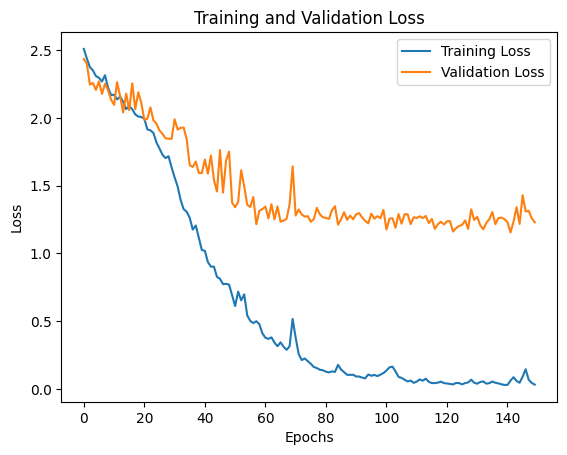

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


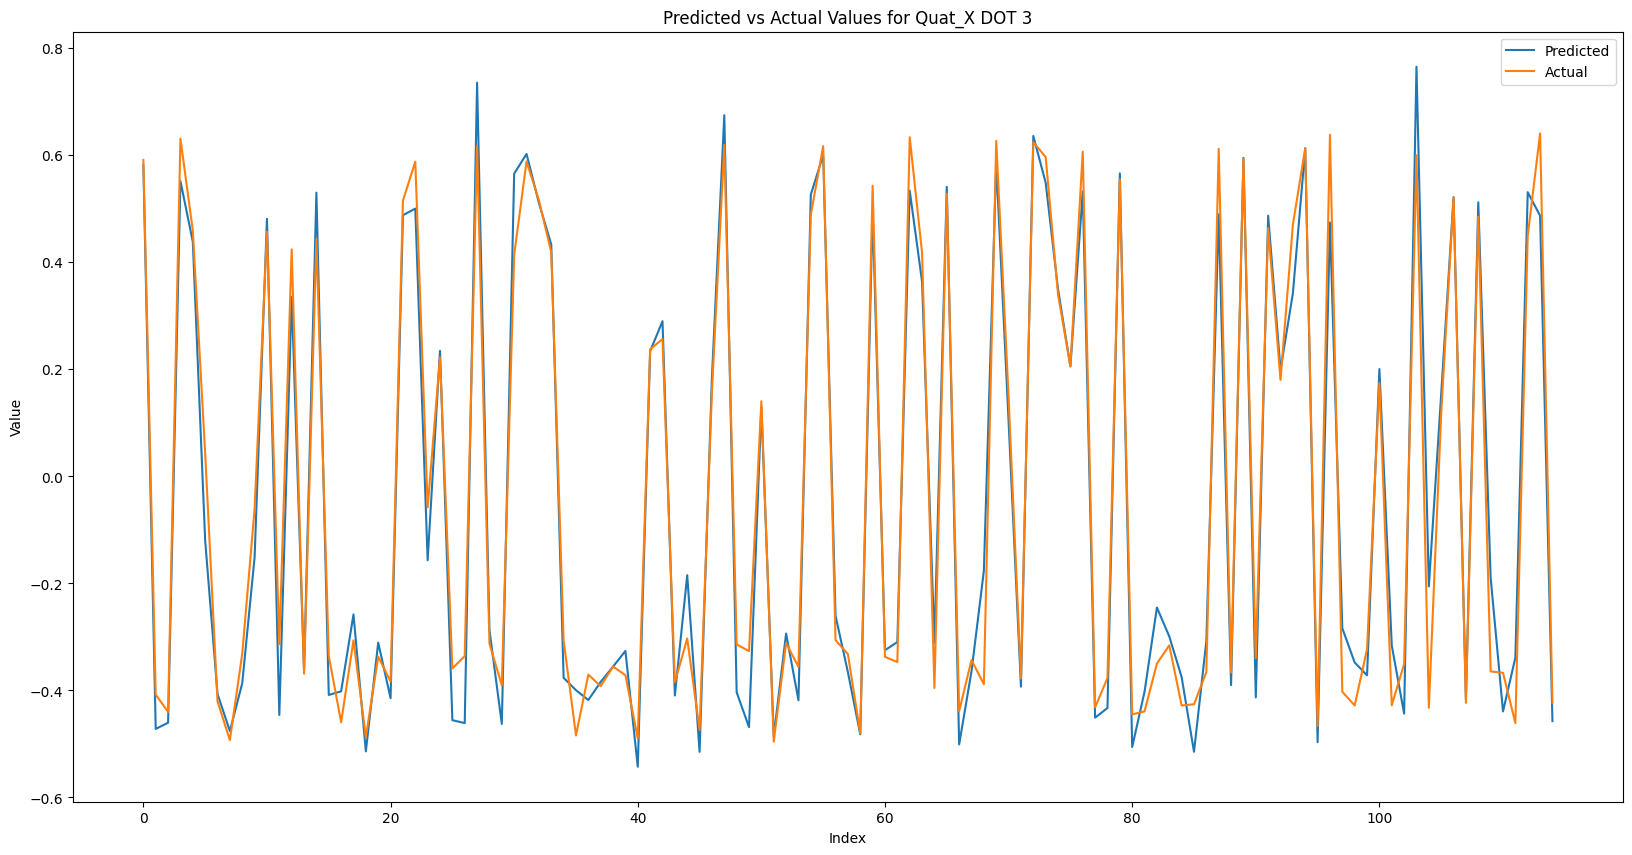

R^2 Score: 0.5930275823714369
Mean Squared Error: 1.3113456468423568


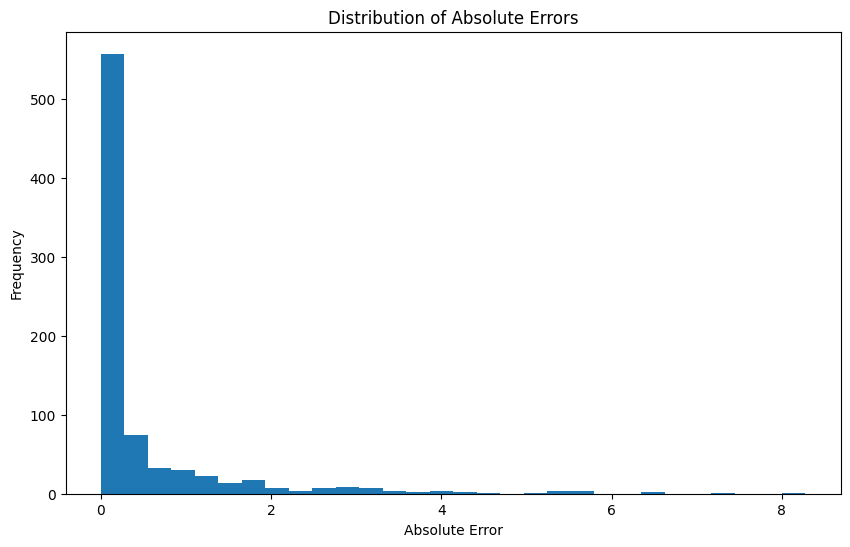

Correlation Matrix:
 [[1.         0.72238804]
 [0.72238804 1.        ]]


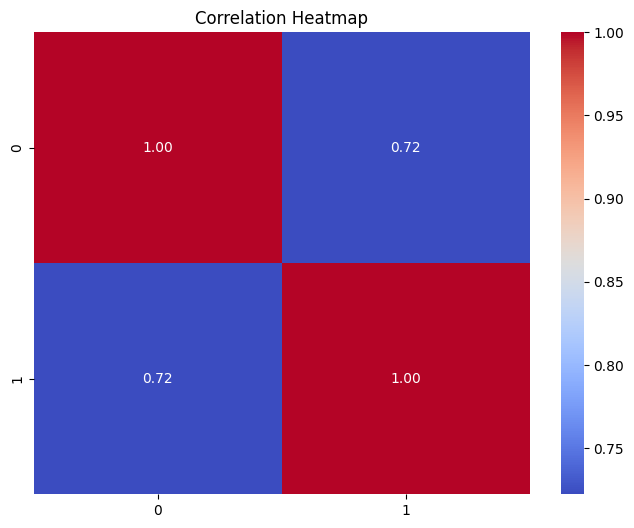

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X, y_DOT3, y_DOT3_train, y_DOT3_test, and predictions are defined

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_DOT3_train, y_DOT3_test = train_test_split(X_scaled, y_DOT3, test_size=0.2, random_state=42)

# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the LSTM model with two neurons
model = Sequential()
model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))  # Change the number of units to 100 for the first neuron and set return_sequences=True
model.add(LSTM(200))  # Add another LSTM layer with 100 units (second neuron)
model.add(Dense(7))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_DOT3_train, epochs=150, batch_size=16, verbose=1, validation_data=(X_test, y_DOT3_test))


# Evaluate the model
mse = model.evaluate(X_test, y_DOT3_test)
print("Mean Squared Error:", mse)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot predictions vs actual
predictions = model.predict(X_test)
plt.figure(figsize=(20, 10))
plt.plot(predictions[:, 0], label='Predicted')
plt.plot(np.array(y_DOT3_test)[:, 0], label='Actual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predicted vs Actual Values for Quat_X DOT 3')
plt.legend()
plt.show()

# Calculate and print accuracy
r_squared = r2_score(y_DOT3_test, predictions)
print("R^2 Score:", r_squared)

# Calculate and print mean squared error
mse = mean_squared_error(y_DOT3_test, predictions)
print("Mean Squared Error:", mse)

# Error analysis
# Error analysis
# Convert predictions and y_DOT3_test to numpy arrays if they are DataFrames
if isinstance(predictions, pd.DataFrame):
    predictions = predictions.values
if isinstance(y_DOT3_test, pd.DataFrame):
    y_DOT3_test = y_DOT3_test.values

# Error analysis
errors = np.abs(predictions - y_DOT3_test)
plt.figure(figsize=(10, 6))
plt.hist(errors.flatten(), bins=30)
plt.title('Distribution of Absolute Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
corr_matrix = np.corrcoef(predictions.flatten(), y_DOT3_test.flatten())
print("Correlation Matrix:\n", corr_matrix)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


[0.5792958105661129, 0.36477211341715954, -0.017083983647635914, 0.0092793935866648, -0.04539154902170611, -0.4184779416809636, -0.21997400522157837, -0.019012163108256375]
[-0.06990360198841708, 0.03766619339165887, 0.0540447557769282, 0.1368776865817921, 0.1365585273811869, -0.37454389785002495, -0.844848596333569, -0.46111794383328997]
[-0.4269821058806408, -0.27239517314088635, -0.2143879290671778, -0.10803932012786466, -0.09588800342275795, -0.09735115766632263, -0.26414004748802555, 0.16703893508370654]
[0.2179850650733461, 0.237952780017829, 0.12716230010588014, 0.15771209186815238, 0.21824719027270983, 0.1119753702914581, 0.12237556590907848, 0.6334772174616189]
[0.6460427078308485, 0.5878198126287453, 0.4093459078901332, 0.386709954484628, 0.17883461758298694, -0.04610217853122214, 0.1967076826559433, 0.829675731841061]


In [ ]:
df = d

In [45]:
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
from keras.optimizers import Adam

# Assuming X, y_DOT3 are defined

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_DOT3, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the base model for ensemble learning
def create_model(learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dense(7))
    optimizer = Adam(learning_rate=learning_rate, clipvalue=0.5)  # Set clipvalue to prevent gradient explosion
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Create an instance of KerasRegressor
model = KerasRegressor(build_fn=create_model, epochs=750, batch_size=32, verbose=0)

# Hyperparameter Tuning (Using Grid Search)
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1]
}

# Wrap the model creation function with KerasRegressor
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the grid search
grid_result = grid.fit(X_train, y_train)

# Ensemble Learning
ensemble_model = VotingRegressor([('model', model), ('grid', grid)])

# Train the model
ensemble_model.fit(X_train, y_train)

# Evaluate the model
mse = mean_squared_error(y_test, ensemble_model.predict(X_test))
print("Mean Squared Error:", mse)


ValueError: Invalid parameter learning_rate for estimator KerasRegressor.
This issue can likely be resolved by setting this parameter in the KerasRegressor constructor:
`KerasRegressor(learning_rate=0.001)`
Check the list of available parameters with `estimator.get_params().keys()`

In [65]:
import tensorflow as tf
print(tf.__version__)


2.16.1


In [36]:
X_train.shape

(458, 1, 7)